In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC

In [2]:
d = pd.read_csv('df_to_machine_learning.csv', index_col=False).drop(['uid','voteDate'], axis=1).dropna()

In [3]:
d = d.dropna()
d

,numVotes,stillExists,liked,disliked,liked_churned_people,vote,Happiness,Activity,likes,dislikes,txt_len
0,4,True,6,0,0,2.500000,-0.000000,37,7.500000,1.000000,114.500000
1,72,True,60,12,1,2.250000,-0.000805,406,5.428571,4.785714,59.571429
2,14,False,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000
3,14,False,1,0,0,3.142857,0.006202,66,6.000000,0.000000,92.000000
4,22,True,6,5,0,3.454545,-0.001876,378,3.333333,0.888889,85.555556
...,...,...,...,...,...,...,...,...,...,...,...
2585,4,True,11,0,0,2.750000,-0.257143,4,1.000000,0.500000,56.500000
2586,3,True,8,4,0,3.666667,0.285714,3,10.333333,0.000000,115.333333
2587,5,True,28,8,0,2.600000,-0.600000,4,10.666667,5.666667,87.000000
2588,1,True,1,0,0,4.000000,0.000000,0,15.000000,0.000000,386.000000


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   numVotes              2590 non-null   int64  
 1   stillExists           2590 non-null   bool   
 2   liked                 2590 non-null   int64  
 3   disliked              2590 non-null   int64  
 4   liked_churned_people  2590 non-null   int64  
 5   vote                  2590 non-null   float64
 6   Happiness             2590 non-null   float64
 7   Activity              2590 non-null   int64  
 8   likes                 2590 non-null   float64
 9   dislikes              2590 non-null   float64
 10  txt_len               2590 non-null   float64
dtypes: bool(1), float64(5), int64(5)
memory usage: 225.1 KB


In [5]:
d.stillExists = ~d.stillExists
d.columns = ['numVotes', 'churned', 'liked', 'disliked', 'liked_churned_people',
       'vote', 'HappinessEvolution', 'LifeSpan', 'positive_feedback_received', 'negative_feedback_received', 'comment_length']
d = d[d.LifeSpan > 10]

In [6]:
d['CommitmentRate'] = (d.numVotes + d.liked + d.disliked) / d.LifeSpan
d['CommitmentRate'] = d['CommitmentRate'].replace(np.inf, 0)

<ipython-input-6-09ad60686e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['CommitmentRate'] = (d.numVotes + d.liked + d.disliked) / d.LifeSpan
<ipython-input-6-09ad60686e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['CommitmentRate'] = d['CommitmentRate'].replace(np.inf, 0)


In [7]:
d['Activity_freq'] = d.numVotes / d.LifeSpan
d['Activity_freq'] = d['Activity_freq'].replace(np.inf, 0)

<ipython-input-7-34b49e6d6c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Activity_freq'] = d.numVotes / d.LifeSpan
<ipython-input-7-34b49e6d6c60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Activity_freq'] = d['Activity_freq'].replace(np.inf, 0)


# Dataframe Code book :
- numVotes : number of votes 
- churned : if the employee has left his company
- liked: number of comments liked by the user
- disliked: number of comments disliked by the user
- liked_churned_people : if the employee has liked a person who left the company
- vote : average value of votes left by the user (1 : worst mood, 4 : best mood)
- happinessEvolution : represent the evolution of user satisfaction from negative value (user sadder over time)to positive value (user happier over time), 0 == no evolution over time
- LifeSpan : user lifespan
- positive_feedback_received: average number of positive feedback received by comment.
- negative_feedback_received: average number of negative feedback received by comment.
- comment_length : average length of user's comments
- CommitmentRate : The greatest the value is the more commited the user is CR = (nvote+liked+disliked) / Activity
- Activity_freq : numVotes / user LifeSpan

In [8]:
d.describe()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,positive_feedback_received,negative_feedback_received,comment_length,CommitmentRate,Activity_freq
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,74.295902,107.719262,20.000000,0.533607,2.915104,0.002624,194.130738,7.116654,1.246873,95.137726,1.249334,0.414775
std,83.573259,207.796683,54.480769,0.498972,0.647235,0.019896,153.347942,5.692372,1.830404,81.522800,1.581511,0.276145
min,0.000000,0.000000,0.000000,0.000000,1.000000,-0.115108,11.000000,0.000000,0.000000,0.750000,0.012346,0.000000
25%,17.000000,10.000000,1.000000,0.000000,2.564538,-0.001600,81.000000,2.839912,0.166667,43.833333,0.330370,0.172840
50%,44.000000,38.000000,4.000000,1.000000,3.000000,0.000384,171.000000,5.600000,0.701852,72.222500,0.757576,0.372556
75%,102.000000,113.000000,16.000000,1.000000,3.333333,0.003549,269.000000,10.000000,1.666667,118.212938,1.500000,0.615674
max,740.000000,3151.000000,891.000000,1.000000,4.000000,0.332168,770.000000,46.000000,33.000000,880.500000,16.304348,1.090909


In [9]:
d.liked_churned_people.sum()

1302

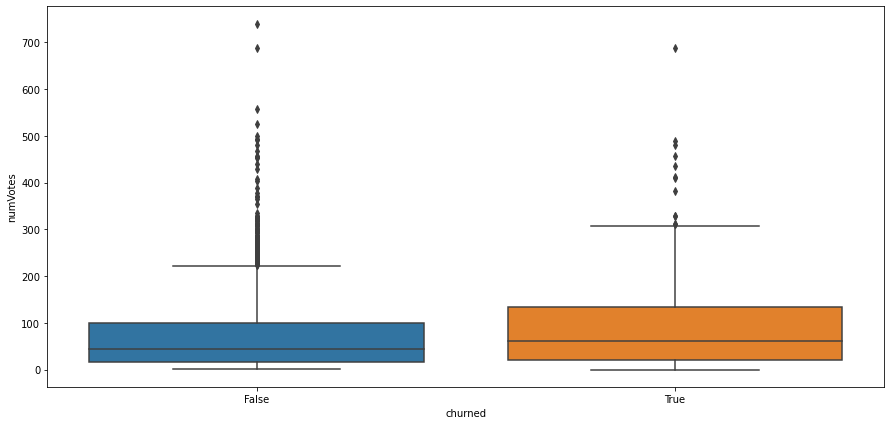

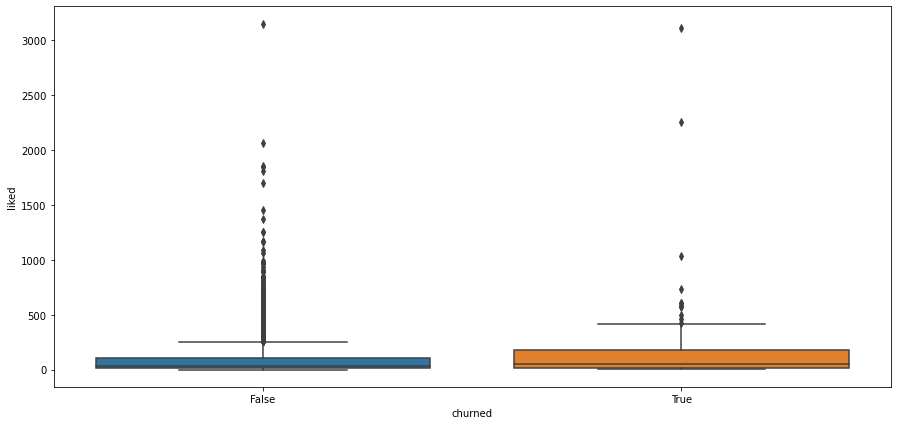

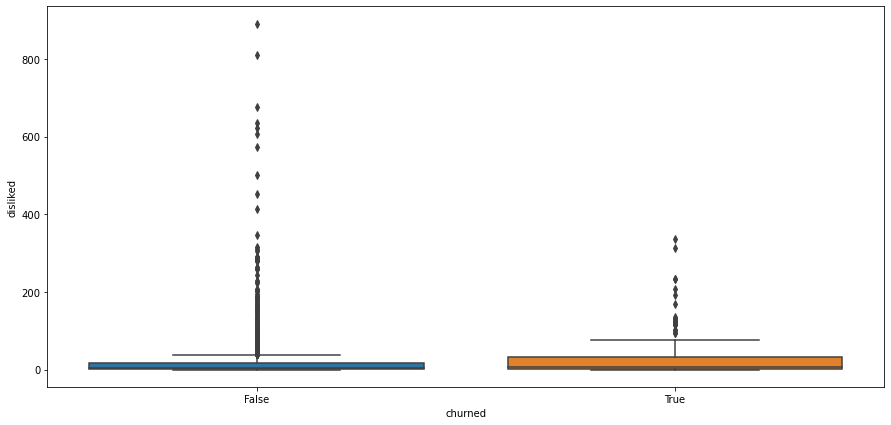

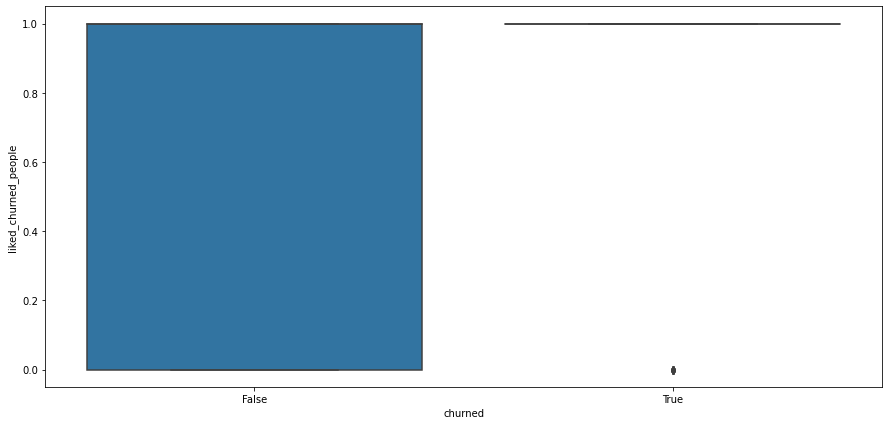

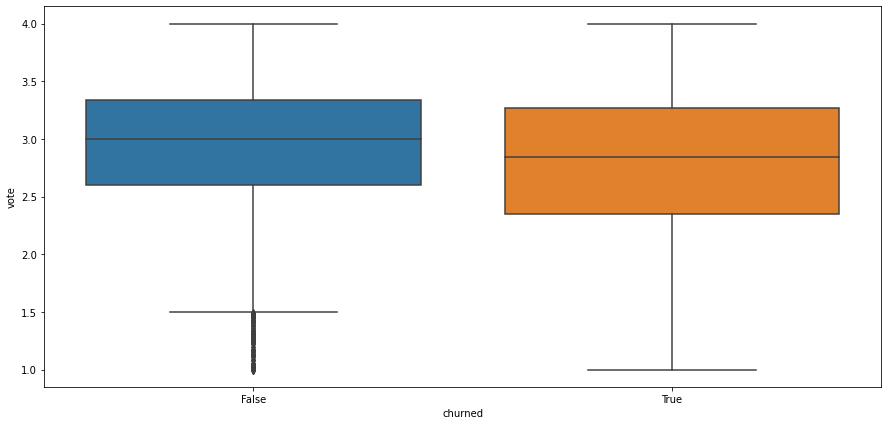

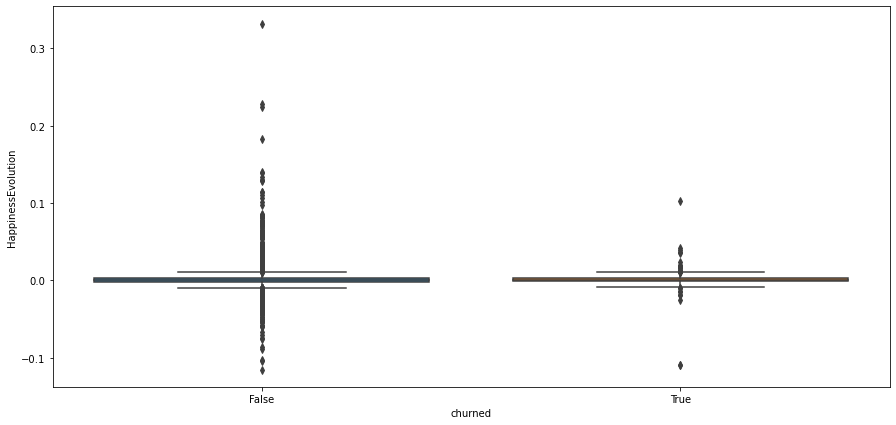

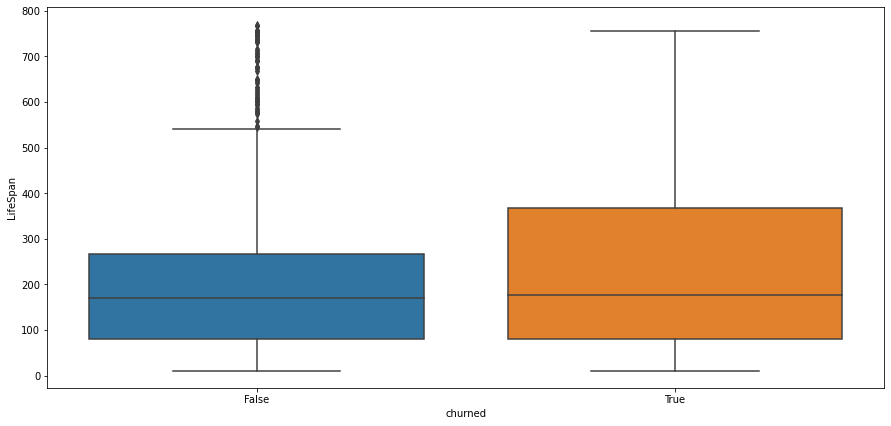

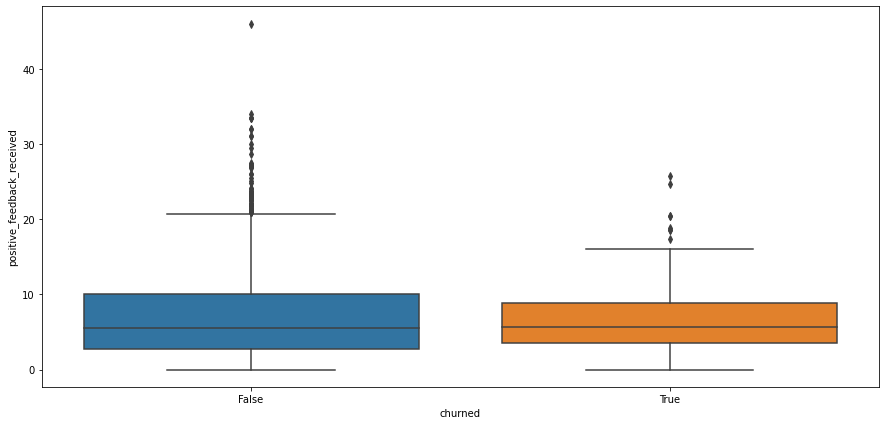

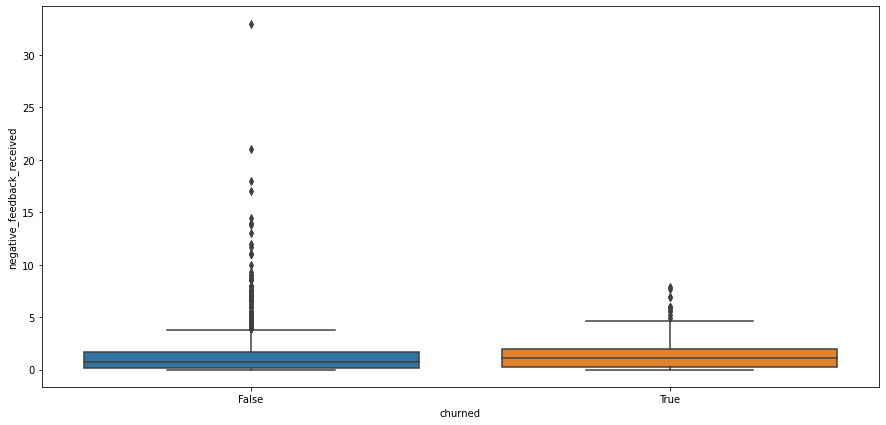

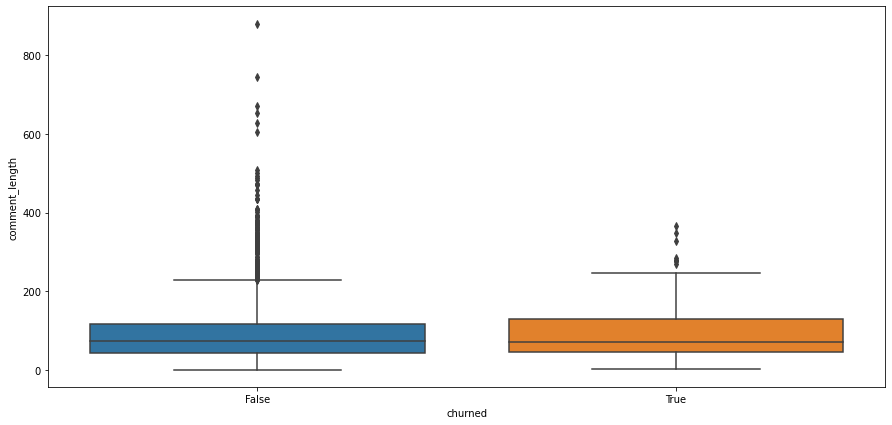

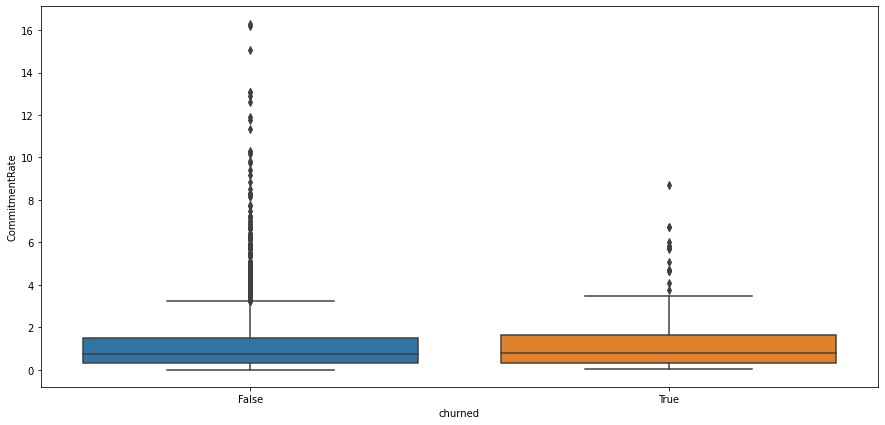

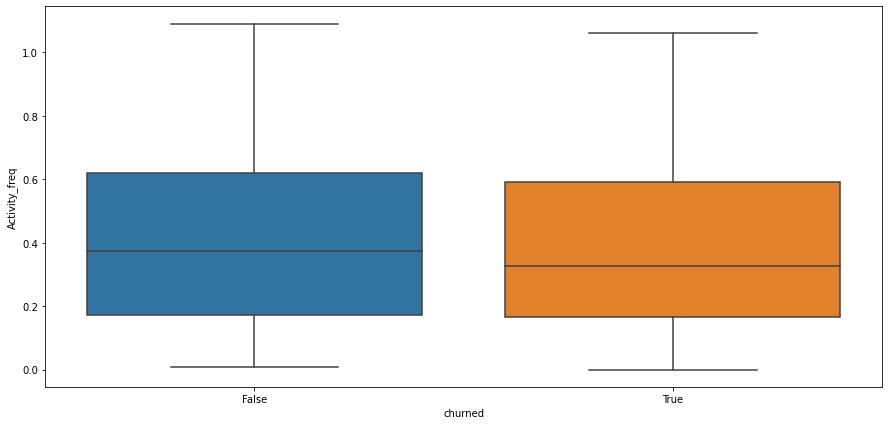

In [10]:
for col in d.columns:
    if col != 'churned':
        fig, ax = plt.subplots(figsize=(15,7))
        sns.boxplot(data=d, x="churned", y=col)
        plt.show()

In [11]:
d.groupby('churned').mean()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,positive_feedback_received,negative_feedback_received,comment_length,CommitmentRate,Activity_freq
churned,,,,,,,,,,,,
False,72.564502,104.489769,19.196619,0.500445,2.929207,0.002716,189.556050,7.149986,1.228544,95.199862,1.245221,0.416735
True,94.567708,145.531250,29.406250,0.921875,2.749979,0.001544,247.692708,6.726383,1.461471,94.410219,1.297489,0.391822


In [12]:
#sns.pairplot(d)

<AxesSubplot:>

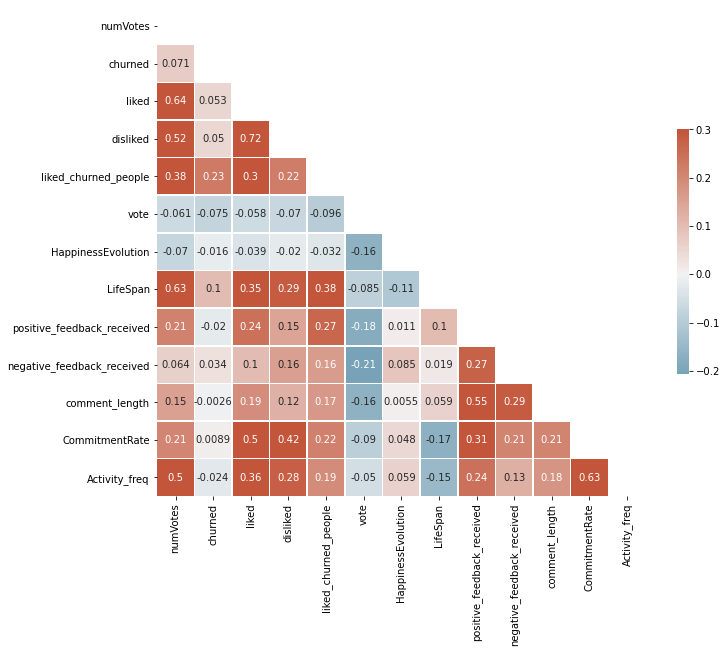

In [13]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [14]:
X = d.drop(columns=['churned'])
y = d[['churned']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)
y_train = y_train.values.reshape(-1)

In [15]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10,solver='newton-cg').fit(X_train, y_train)
score = clf.score(X_train, y_train)
score

0.9226434426229508

In [118]:
neigh = KNeighborsClassifier(n_neighbors=1)
cross_val_score(neigh, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.8847357404500261

In [93]:
parameters = {'n_neighbors': list(range(1,31))}
grid = GridSearchCV(neigh, parameters, verbose=1, return_train_score=True, scoring='f1_micro')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='f1_micro', verbose=1)

In [94]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

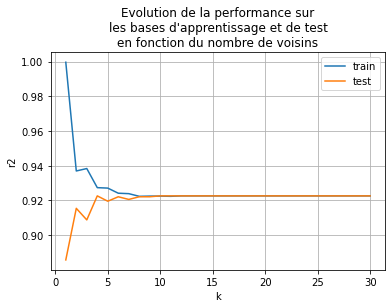

In [95]:
df_score = pd.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = df_score.plot(x='k', y='train', figsize=(6, 4))
df_score.plot(x='k', y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("f1");

In [97]:
y_pred = grid.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[447,   0],
       [ 41,   0]])

In [99]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [100]:
y_test.value_counts()

churned
False      447
True        41
dtype: int64

In [101]:
confusion_matrix(y_test, y_pred)

array([[422,  25],
       [ 27,  14]])

In [75]:
recall = recall_score(y_test, y_pred, average='micro')
recall

0.8934426229508197

# The precision is the ratio tp / (tp + fp) 
## The best value is 1 and the worst value is 0.

In [76]:
precision = precision_score(y_test, y_pred, average='micro')
precision

0.8934426229508197

# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution # of precision and recall to the F1 score are equal. The formula for the F1 score is:

In [77]:
y_pred = neigh.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.8934426229508197

In [23]:
y_test.value_counts()

churned
False      447
True        41
dtype: int64

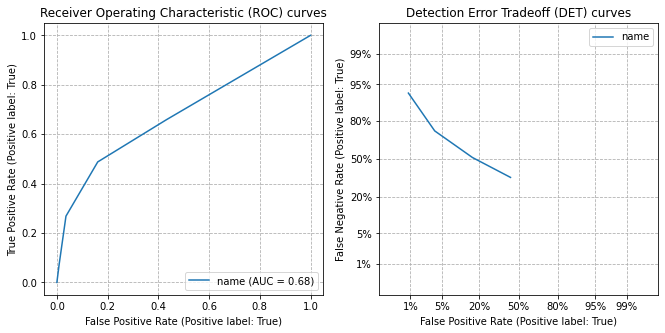

In [130]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(grid, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(grid, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [33]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9236680327868853

In [37]:
y_pred = clf.predict(X_test)

In [42]:
#y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.9159836065573771

In [27]:
confusion_matrix(y_test, y_pred)

array([[447,   0],
       [ 41,   0]])

In [28]:
y_test.value_counts()

churned
False      447
True        41
dtype: int64

In [29]:
np.unique(y_pred, return_counts=True)

(array([False]), array([488]))

## The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## The best value is 1 and the worst value is 0.

In [119]:
recall_score(y_test, y_pred, average='micro')

0.930327868852459

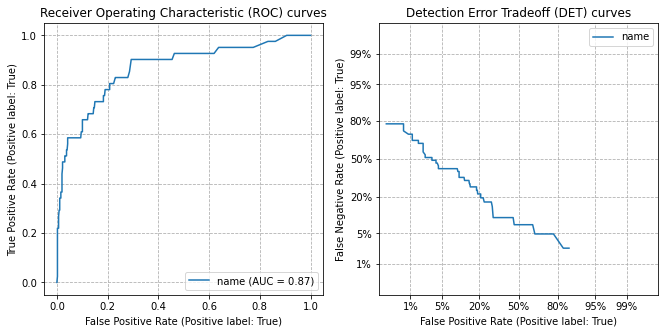

In [132]:

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(grid_rfc, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(grid_rfc, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [122]:

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
cross_val_score(gpc, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.9231580324437468

In [ ]:
y_train.shape

In [123]:

clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.8765306122448979

In [ ]:
scl = StandardScaler()
X_ = scl.fit_transform(X)
pca = PCA()
pca.fit(X_)

In [ ]:
pca.explained_variance_ratio_

0.9349398220826792

In [201]:
clf = RandomForestClassifier(class_weight="balanced", verbose=0, warm_start=False, criterion="entropy", )
#print(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean())
parameters = { 
    'n_estimators': [8000],
    'max_features': ['sqrt', 'log2'],
    'n_jobs':[-1]
}
grid_rfc = GridSearchCV(clf, parameters, verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [8000], 'n_jobs': [-1]},
             return_train_score=True, scoring='f1_micro', verbose=2)

In [202]:
y_pred = grid_rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[446,   1],
       [ 32,   9]])

In [187]:
clf = LinearSVC(tol=1e-3)
parameters = { 
    'max_iter': [1000],

}
grid_lsvc = GridSearchCV(clf, parameters, verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_lsvc.fit(X_train, y_train)
y_pred = grid_lsvc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[441,   6],
       [ 41,   0]])

In [182]:
clf = GaussianNB()
parameters = { 
    'var_smoothing': [1e-12],
}
grid_gnb = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_gnb.fit(X_train, y_train)
y_pred = grid_rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


array([[446,   1],
       [ 32,   9]])

In [192]:
clf = SVC()
parameters = { 
    'kernel':['rbf','sigmoid'],
    'gamma':[0.7],
    'C':[1]
}
grid_svc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_svc.fit(X_train, y_train)
y_pred = grid_svc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[446,   1],
       [ 36,   5]])

In [169]:
clf = AdaBoostClassifier()
parameters = { 
    'learning_rate': [1,2],
}
grid_abc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_abc.fit(X_train, y_train)
y_pred = grid_abc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[444,   3],
       [ 34,   7]])

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
parameters = { 
    'learning_rate': [0.1,2],
}
grid_gbc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_gbc.fit(X_train, y_train)
y_pred = grid_gbc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[445,   2],
       [ 33,   8]])

In [200]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
parameters = { 
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha': [1, 10],
    'learning_rate': ['adaptive']
}
grid_mlpc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1_micro', n_jobs=-1,)
grid_mlpc.fit(X_train, y_train)
y_pred = grid_mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[447,   0],
       [ 41,   0]])

In [110]:
res = grid_rfc.cv_results_
train_score = res['mean_train_score']
test_score = res['mean_test_score']

In [113]:
test_score

array([0.93391698, 0.93545282, 0.93442849, 0.93494   , 0.93494131,
       0.93494131])

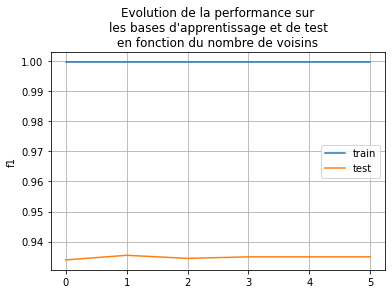

In [112]:
df_score = pd.DataFrame(dict(test=test_score, train=train_score))
ax = df_score.plot(y='train', figsize=(6, 4))
df_score.plot(y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("f1");

In [52]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.930327868852459

In [116]:
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [117]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.76467824, 2.60786481, 0.81413708, 2.92647166, 0.76162028,
        2.6706018 ]),
 'std_fit_time': array([0.06661521, 0.14834808, 0.05360784, 0.29534981, 0.05301793,
        0.13151461]),
 'mean_score_time': array([0.03323174, 0.10348425, 0.03777575, 0.13050933, 0.03241243,
        0.12092915]),
 'std_score_time': array([0.00560727, 0.00861834, 0.00797691, 0.02201825, 0.00250071,
        0.01729808]),
 'param_max_features': masked_array(data=['auto', 'auto', 'sqrt', 'sqrt', 'log2', 'log2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 700, 200, 700, 200, 700],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 200},
  {'max_features': 'auto', 'n_estimators': 700},
  {'max_features': 'sqrt', 'n_estimators': 200},
  {'max_features': 

In [127]:
clf = AdaBoostClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.9175222396650968

In [128]:
clf = GaussianNB()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.861156462585034

In [129]:
clf = QuadraticDiscriminantAnalysis()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean()

0.8795944531658819